In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('mma_mart.csv')

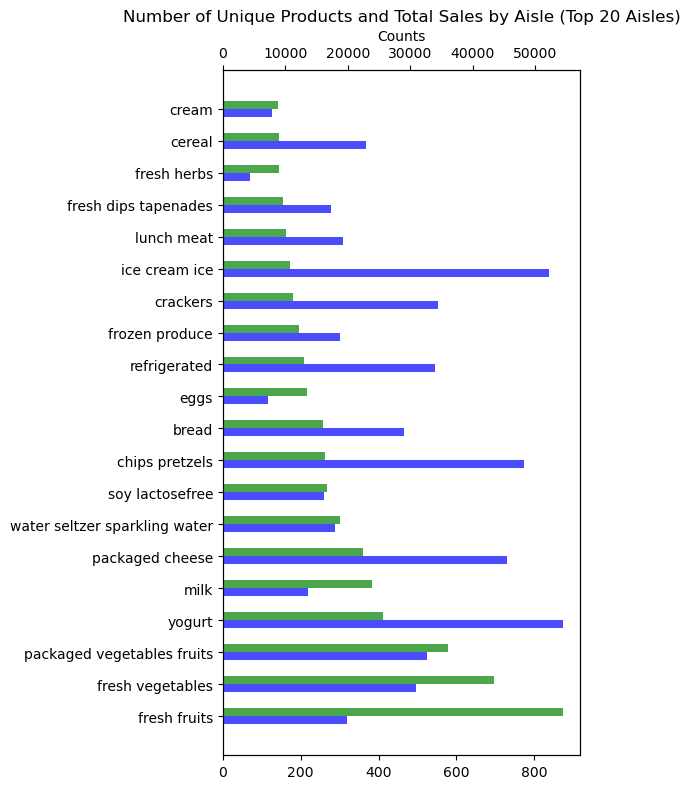

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [18]:
# Group by aisle and calculate the number of unique products and total sales (unique order_id)
aisle_stats = df.groupby('aisle')['product_id'].nunique().reset_index()
aisle_stats.columns = ['aisle', 'unique_products']
aisle_stats['total_sales'] = df.groupby('aisle')['order_id'].nunique().values

# Sort the data by total sales and select the top 20 aisles
aisle_stats = aisle_stats.sort_values(by='total_sales', ascending=False).head(20)

# Set the figure size
plt.figure(figsize=(6, 8))

# Set the width of each bar
bar_width = 0.25

# Calculate the position of bars on the y-axis
index = np.arange(len(aisle_stats))

# Create bars for unique products
plt.barh(index, aisle_stats['unique_products'], bar_width, label='Unique Products', color='b', alpha=0.7)

# Create a secondary y-axis for total sales with a different scale
ax2 = plt.gca().twiny()
ax2.barh(index + bar_width, aisle_stats['total_sales'], bar_width, label='Total Sales', color='g', alpha=0.7)

# Set y-axis labels
plt.xlabel('Counts')

# Set the y-axis ticks and labels
plt.yticks(index + bar_width / 2, aisle_stats['aisle'], rotation=0, ha='left')

# Add a title
plt.title('Number of Unique Products and Total Sales by Aisle (Top 20 Aisles)')

# Save the plot as a PNG file without legends
plt.savefig('aisle_stats_plot.png', format='png', bbox_inches='tight', pad_inches=0.2)

# Show the plot without legends
plt.tight_layout()
plt.show()

# Create separate legends and save them as PNG files
plt.figure(figsize=(4, 1))  # Adjust the figure size for legends
plt.legend(loc='upper left')
plt.savefig('legend_unique_products.png', format='png', bbox_inches='tight', pad_inches=0.1)
plt.close()

plt.figure(figsize=(4, 1))  # Adjust the figure size for legends
ax2.legend(loc='upper right')
plt.savefig('legend_total_sales.png', format='png', bbox_inches='tight', pad_inches=0.1)
plt.close()

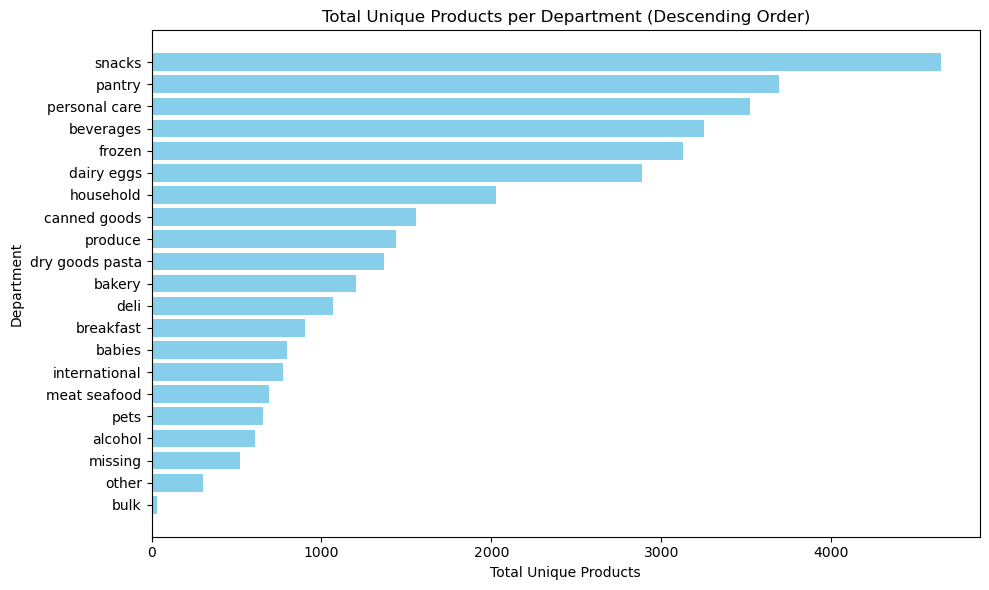

In [21]:
# Group by department and count unique products
department_stats = df.groupby('department')['product_name'].nunique().reset_index()
department_stats.columns = ['department', 'total_products']

# Sort by total products in descending order
department_stats = department_stats.sort_values(by='total_products', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(department_stats['department'], department_stats['total_products'], color='skyblue')
plt.xlabel('Total Unique Products')
plt.ylabel('Department')
plt.title('Total Unique Products per Department (Descending Order)')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.savefig('legend_total_sales.png', format='png', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

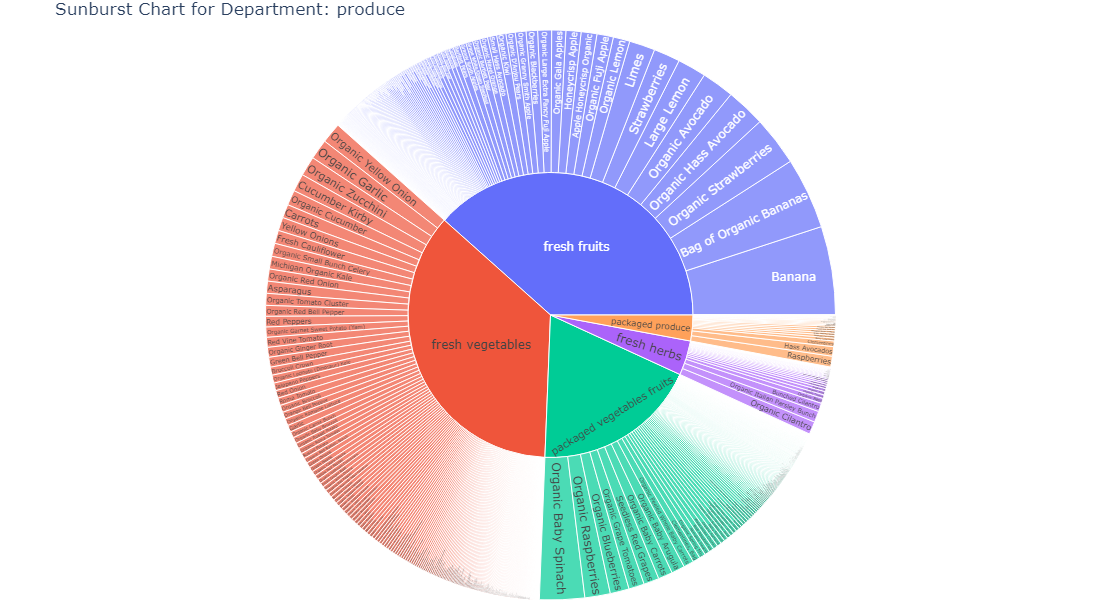

In [31]:
df = pd.read_csv('mma_mart.csv')
import plotly.express as px
import plotly.io as pio
department_df = df[df['department'] == 'produce']

unique_aisles = department_df['aisle'].unique()
unique_products = department_df['product_name'].unique()

# Create a sunburst chart for the current department
fig = px.sunburst(department_df, path=['aisle', 'product_name'])

# Customize the layout
fig.update_layout(
        title=f"Sunburst Chart for Department: {'produce'}",
        margin=dict(l=0, r=0, b=0, t=30),
        paper_bgcolor="white",
        height=600,  # Adjust the height
        width=800,   # Adjust the width
)
    # Show the chart
fig.show()


# Save the figure as a PNG file
